In [133]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np 


# First Glace

In [134]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

<AxesSubplot:>

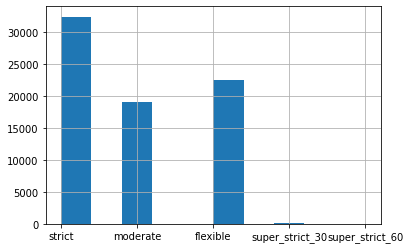

In [136]:
df.cancellation_policy.hist()

<AxesSubplot:>

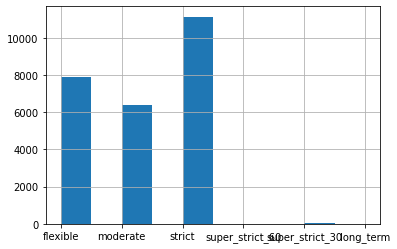

In [137]:
df_test['cancellation_policy'].hist()

# Training Set

In [138]:
train = df[['cancellation_policy','accommodates','number_of_reviews','room_type','city','cleaning_fee']]
train.head()

,cancellation_policy,accommodates,number_of_reviews,room_type,city,cleaning_fee
0,strict,3,2,Entire home/apt,NYC,True
1,strict,7,6,Entire home/apt,NYC,True
2,moderate,5,10,Entire home/apt,NYC,True
3,flexible,4,0,Entire home/apt,SF,True
4,moderate,2,4,Entire home/apt,DC,True


In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cancellation_policy  74111 non-null  object
 1   accommodates         74111 non-null  int64 
 2   number_of_reviews    74111 non-null  int64 
 3   room_type            74111 non-null  object
 4   city                 74111 non-null  object
 5   cleaning_fee         74111 non-null  bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 2.9+ MB


In [140]:
change = []
for i in train.cancellation_policy: 
    if i == 'super_strict_60':
        a = 'strict'
    if i == 'super_strict_30':
        a = 'strict'
    if i == 'long_term':
        a = 'strict'
    if i == 'flexible':
        a = 'flexible'
    if i == 'moderate':
        a = 'moderate'
    if i == 'strict':
        a = 'strict'
    change.append(a)

 
train['cancellation_policy'] = change

<ipython-input-140-66d542c26f80>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cancellation_policy'] = change


In [141]:
list3 = []
for key in train.cleaning_fee:
    if key == True:
        f = 1
    if key == False:
        f = 0
    list3.append(f)
train['cleaning_fee'] = list3

<ipython-input-141-b619e6dc91e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cleaning_fee'] = list3


In [142]:
train = pd.get_dummies(train,columns=['room_type','city'])

In [143]:
X_train = train.drop(columns = ['cancellation_policy'])
y_train = train['cancellation_policy']

<AxesSubplot:>

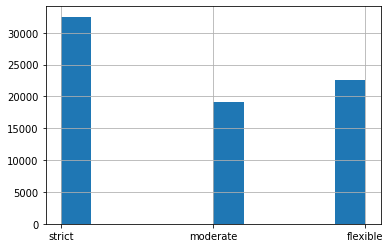

In [144]:
y_train.hist()

# Testing Set

In [145]:
test = df_test[['cancellation_policy','accommodates','number_of_reviews','room_type','city','cleaning_fee']]

In [146]:
change_test = []
for i in test['cancellation_policy']: 
    if i == 'super_strict_60':
        k = 'strict'
    if i == 'super_strict_30':
        k = 'strict'
    if i == 'long_term':
        k = 'strict'
    if i == 'strict':
        k = 'strict'
    if i == 'moderate':
        k = 'moderate'
    if i == 'flexible':
        k = 'flexible'
    change_test.append(k)
test['cancellation_policy'] = change_test

<ipython-input-146-8e30c9cf9ed0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cancellation_policy'] = change_test


In [147]:
X_test = test[['accommodates','number_of_reviews','room_type','city','cleaning_fee']]
y_test = test['cancellation_policy']

In [148]:
list4 = []
for key in X_test.cleaning_fee:
    if key == True:
        f = 1
    if key == False:
        f = 0
    list4.append(f)
X_test['cleaning_fee'] = list4

<ipython-input-148-0849fe6e22dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cleaning_fee'] = list4


In [149]:
X_test = pd.get_dummies(X_test,columns=['room_type','city'])

In [150]:
 from sklearn.tree import DecisionTreeClassifier

# Training and Testing

### DecisionTree (Chenxu Yi)

In [173]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets

#### Create the model

In [174]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Result of initial model

In [175]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    flexible       0.54      0.61      0.58      7890
    moderate       0.33      0.16      0.22      6387
      strict       0.55      0.66      0.60     11181

    accuracy                           0.52     25458
   macro avg       0.47      0.48      0.46     25458
weighted avg       0.49      0.52      0.49     25458



In [176]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5183046586534684


#### GridSearchCV 

In [179]:
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('pca', pca),('dec_tree', dec_tree)])

In [183]:
n_components = list(range(1,X_train.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components, dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)

In [186]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5]})

#### Result of GridSearch

In [197]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print()
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 6

DecisionTreeClassifier(criterion='entropy', max_depth=6)


#### The best performance of my model

In [193]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6,)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5486291146201587


In [198]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    flexible       0.60      0.56      0.58      7890
    moderate       0.33      0.01      0.02      6387
      strict       0.53      0.85      0.65     11181

    accuracy                           0.55     25458
   macro avg       0.49      0.47      0.42     25458
weighted avg       0.50      0.55      0.47     25458



#### Log_Loss function

In [205]:
from sklearn.metrics import log_loss
pred_loss = clf.predict_proba(X_test)
log_loss(y_test,pred_loss)

0.9448533445599485